Hi everyone, my name is Yohanes Kurniawan Hertanto.

Right now I'm going to analyze a dataset that contains a bank customer's database, the dataset itself was provided through Kaggle.

My main objective is create a supervised machine learning to predict customer churn based on certain features/variables inside the dataset.

As usual, I'm going to perform data cleaning, data preparation, data manipulation and exploratory data analysis (EDA) before creating the model to predict customer churn.

**NOTE:**

1. This notebook is designed for execution in Google Colab or Kaggle.
2. If you're running this notebook on Colab and encounter missing libraries, please uncomment and run the installation line below on the next two lines:

a. !pip install -U scikit-learn

b. !pip install -U imbalanced-learn

c. !pip install -U xgboost

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## **I. IMPORT LIBRARIES**

Other than importing libraries I'm also updating the version of SK Learn, Imbalanced Learn, and XGBoost.

In [ ]:
# !pip install -U scikit-learn
# !pip install -U imbalanced-learn
# !pip install -U xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 90.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 7.1 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.ticker import FuncFormatter

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from collections import Counter
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve

## **II. LOAD AND CHECK THE DATASET**

In [ ]:
# Load the dataset into Kaggle notebook
# The dataset is loaded directly from the GitHub repository for reproducibility
df_customer = pd.read_csv("https://raw.githubusercontent.com/yohaneskh/Bank-Customer-Churn-Prediction_Finished/refs/heads/main/Churn_Modelling.csv")

# Display the first 5 rows of the dataset for early identification
df_customer.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [ ]:
# Display columns names of the dataset
# I will refer columns as features or variables
col_names = df_customer.columns
col_names

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# Display the summary and dimension of the dataset
df_customer.info()
df_customer.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


(10002, 14)

Based on the summary above, I identify 14 features with 10,002 rows/values.

Taken from the source, below is the description of each feature of the dataset,

1. **CustomerID**: A unique identifier for each customer
2. **Surname**: The customer's surname or last name
3. **CreditScore**: A numerical value representing the customer's credit score
4. **Geography**: The country where the customer resides (France, Spain or Germany)
5. **Gender**: The customer's gender (Male or Female)
6. **Age**: The customer's age.
7. **Tenure**: The number of years the customer has been with the bank
8. **Balance**: The customer's account balance
9. **NumOfProducts**: The number of bank products the customer uses (e.g., savings account, credit card)
10. **HasCrCard**: Whether the customer has a credit card (**1 = yes, 0 = no**)
11. **IsActiveMember**: Whether the customer is an active member (**1 = yes, 0 = no**)
12. **EstimatedSalary**: The estimated salary of the customer
13. **Exited**: Whether the customer has churned (**1 = yes, 0 = no**)

## **III. DATA PREPARATION**

Before I proceed to analyze the data distribution, encoding, scaling etc of the dataset, I'm going to do some **Data Preparation** procedures such as,
1. Check the unique values inside each feature.
2. Check the data distribution.
3. Handle any duplicated values.
4. Handle any missing values.

**1. Check unique values inside each feature**

Since features like **Customer ID** and **Surname** surely have lots of unique values, I'm not going to check and count unique values from those features.

In [ ]:
# Show the proportion of customers' CreditScore
df_customer["CreditScore"].value_counts(normalize=True).mul(100).round(2).sort_index()

CreditScore
350    0.05
351    0.01
358    0.01
359    0.01
363    0.01
       ... 
846    0.05
847    0.06
848    0.05
849    0.08
850    2.33
Name: proportion, Length: 460, dtype: float64

In [ ]:
# Show the proportion of customers' country of origin
df_customer["Geography"].value_counts(normalize=True).mul(100).round(2)

Geography
France     50.13
Germany    25.10
Spain      24.77
Name: proportion, dtype: float64

In [ ]:
# Show the proportion of gender
df_customer["Gender"].value_counts(normalize=True).mul(100).round(2)

Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64

In [ ]:
# Show the proportion of customer's age
df_customer["Age"].value_counts(normalize=True).mul(100).round(2).sort_index()

Age
18.0    0.22
19.0    0.27
20.0    0.40
21.0    0.53
22.0    0.84
        ... 
83.0    0.01
84.0    0.02
85.0    0.01
88.0    0.01
92.0    0.02
Name: proportion, Length: 73, dtype: float64

In [ ]:
# Show the proportion of customers' tenure (in years) with the bank
df_customer["Tenure"].value_counts(normalize=True).mul(100).round(2).sort_index()

Tenure
0      4.13
1     10.35
2     10.48
3     10.10
4      9.90
5     10.12
6      9.67
7     10.28
8     10.25
9      9.84
10     4.90
Name: proportion, dtype: float64

In [ ]:
# Show the proportion of customers' balance in the bank
df_customer["Balance"].value_counts(normalize=True).mul(100).round(2).sort_index()

Balance
0.00         36.16
3768.69       0.01
12459.19      0.01
14262.80      0.01
16893.59      0.01
             ...  
216109.88     0.01
221532.80     0.01
222267.63     0.01
238387.56     0.01
250898.09     0.01
Name: proportion, Length: 6382, dtype: float64

In [ ]:
# Show the proportion of customers' bank product ownership
df_customer["NumOfProducts"].value_counts(normalize=True).mul(100).round(2).sort_index()

NumOfProducts
1    50.84
2    45.90
3     2.66
4     0.60
Name: proportion, dtype: float64

In [ ]:
# Show the proportion of customers with and without credit card ownership
df_customer["HasCrCard"].value_counts(normalize=True).mul(100).round(2)

HasCrCard
1.0    70.55
0.0    29.45
Name: proportion, dtype: float64

In [ ]:
# Show the percentage of active and inactive customer
df_customer["IsActiveMember"].value_counts(normalize=True).mul(100).round(2)

IsActiveMember
1.0    51.49
0.0    48.51
Name: proportion, dtype: float64

In [ ]:
# Show the proportion of customers'Estimated Salary
df_customer["EstimatedSalary"].value_counts(normalize=True).mul(100).round(2).sort_index()

EstimatedSalary
11.58        0.01
90.07        0.01
91.75        0.01
96.27        0.01
106.67       0.01
             ... 
199909.32    0.01
199929.17    0.01
199953.33    0.01
199970.74    0.01
199992.48    0.01
Name: proportion, Length: 9999, dtype: float64

In [ ]:
# Show the percentage of churn customers
df_customer["Exited"].value_counts(normalize=True).mul(100).round(2)

Exited
0    79.62
1    20.38
Name: proportion, dtype: float64

**2. Check the data distribution**

Next, I want to check data distribution **(min, max, and quantile)** of numerical features.


In [ ]:
df_customer[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
CreditScore,10002.0,650.56,96.66,350.00,584.00,652.00,718.00,850.00
Age,10001.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10002.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10002.0,76491.11,62393.47,0.00,0.00,97198.54,127647.84,250898.09
NumOfProducts,10002.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10001.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10001.0,0.51,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10002.0,100083.33,57508.12,11.58,50983.75,100185.24,149383.65,199992.48


**3. Handle any duplicated values**

Next, I want to check if the dataset has any duplicated values. For me, the best way is to check from CustomerID, because customers might have the same Surname, Geography, Age, Tenure etc.

In [ ]:
# Check for any duplicated values based on selected features
# keep=False means marking all duplicates
duplicated_value = df_customer.duplicated(subset=["CustomerId"], keep=False)
df_customer_duplicate = df_customer[duplicated_value].sort_values(by=["CustomerId"])

# Show any duplicated values
df_customer_duplicate

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


Now I've found the duplicated values which are **CustomerId 15628319 and 15682355**. I've decided to delete the extra rows from the dataset.

Before I delete the duplicated values, I'm going to save the original dataset df_customer as a backup and rename it into df_customer_raw.

In [ ]:
# Backup the original dataset (df_customer) using the name df_customer_raw
df_customer_raw = df_customer.copy()

In [ ]:
# Clean the data by getting rid of duplicates
# By using keep="first", the second row will be counted as a duplicate and will be dropped
df_customer_clean = df_customer.drop_duplicates(subset=["CustomerId"], keep="first")

# Comparing before and after dropping the duplicates
print(f"No. of rows before cleaning: {len(df_customer_raw)}")
print(f"No. of rows after cleaning: {len(df_customer_clean)}")
print(f"Dropped duplicates: {len(df_customer_raw) - len(df_customer_clean)}")

No. of rows before cleaning: 10002
No. of rows after cleaning: 10000
Dropped duplicates: 2


**4. Handle any missing values**

Since I have dropped duplicated values from the original dataset (df_customer_raw), I'm going to use df_customer_clean for further analysis. Now, I have 10,000 values to be analyzed.

After the previous step, I want to check and count with null values. After that, I can decide whether they will be dropped or imputed.

In [ ]:
# Count the rows with missing or null values
df_customer_clean[df_customer_clean.isnull().any(axis=1)].shape[0]

4

In [ ]:
# Display all rows with missing or null values
df_customer_clean[df_customer_clean.isnull().any(axis=1)]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


I found out that there are **4 rows with missing values** (NaN),
1. Row 4 has 1 null value in HasCrCard.
2. Row 6 has 1 null value in Geography.
3. Row 8 has 1 null value in IsActiveMember.
4. Row 9 has 1 null value in Age.

Based on my knowledge, it is acceptable to drop all of them because it's only 1 row from each feature.

For this time, these are what I'm going to do,
1. Impute 1 row with null value from Age value with median.
2. Drop 3 rows with null values from HasCrCard, Geography, and IsActiveMember.

In [ ]:
# Drop rows with missing values from HasCrCard, Geography, and IsActiveMember feature
df_customer_clean.dropna(subset=["HasCrCard", "Geography", "IsActiveMember"], inplace=True)

# Impute missing value from Age feature with median value
df_customer_clean["Age"].fillna(df_customer_clean["Age"].median(), inplace=True)

/tmp/ipykernel_13/3589722576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_clean.dropna(subset=["HasCrCard", "Geography", "IsActiveMember"], inplace=True)
/tmp/ipykernel_13/3589722576.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_customer_clean["Age"].fillna(df_customer_clean["Age"].median(), inplace=True)
/tmp/ipyke

I just realized that all values inside **HasCrCard** and **IsActiveMember** have the **wrong Dtype (float)**. I'm going to transform the Dtypes from Float into Int (1=yes and 0=no).

In [ ]:
# Transform the Dtype of values inside HasCrCard and IsActiveMember from Float into Int
df_customer_clean["HasCrCard"] = df_customer_clean["HasCrCard"].astype(int)
df_customer_clean["IsActiveMember"] = df_customer_clean["IsActiveMember"].astype(int)

/tmp/ipykernel_13/150347566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_clean["HasCrCard"] = df_customer_clean["HasCrCard"].astype(int)
/tmp/ipykernel_13/150347566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_clean["IsActiveMember"] = df_customer_clean["IsActiveMember"].astype(int)


In [ ]:
# Display the updated summary and dimension of the dataset
df_customer_clean.info()
df_customer_clean.shape

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9997 non-null   int64  
 1   CustomerId       9997 non-null   int64  
 2   Surname          9997 non-null   object 
 3   CreditScore      9997 non-null   int64  
 4   Geography        9997 non-null   object 
 5   Gender           9997 non-null   object 
 6   Age              9997 non-null   float64
 7   Tenure           9997 non-null   int64  
 8   Balance          9997 non-null   float64
 9   NumOfProducts    9997 non-null   int64  
 10  HasCrCard        9997 non-null   int64  
 11  IsActiveMember   9997 non-null   int64  
 12  EstimatedSalary  9997 non-null   float64
 13  Exited           9997 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


(9997, 14)

Now, I have 9,997 rows left after I dropped the ones with null values.

Right now, I want to know where do the remaining customers live and I also want to know the gender composition.

In [ ]:
# Check unique values and their counts
df_customer_clean[["Geography", "Gender"]].value_counts()

Geography  Gender
France     Male      2751
           Female    2261
Spain      Male      1388
Germany    Male      1316
           Female    1193
Spain      Female    1088
Name: count, dtype: int64

In [ ]:
# Check value counts with percentages (rounded to 2 decimal places))
df_customer_clean[["Geography", "Gender"]].value_counts(normalize=True).mul(100).round(2)

Geography  Gender
France     Male      27.52
           Female    22.62
Spain      Male      13.88
Germany    Male      13.16
           Female    11.93
Spain      Female    10.88
Name: proportion, dtype: float64

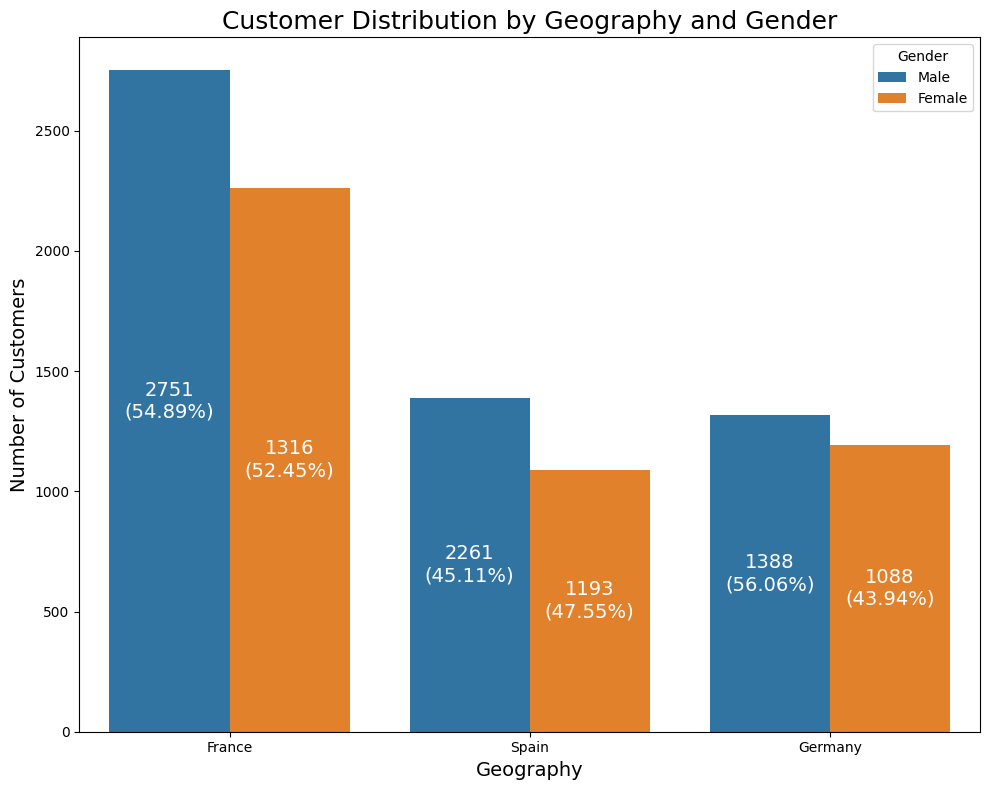

In [ ]:
# Visualization using stacked bar chart for Geography and Gender features with value counts and percentage

# Count the combinations of Geography and Gender values
combo_counts = df_customer_clean[["Geography", "Gender"]].value_counts().reset_index(name="Count")

# Calculate percentage based on total in each Geography value
combo_counts["Percentage"] = combo_counts.groupby("Geography")["Count"].transform(lambda x: (x / x.sum()) * 100)

# Create a stacked bar chart using Seaborn
plt.figure(figsize=(10, 8))
barplot = sns.barplot(data=combo_counts, x="Geography", y="Count", hue="Gender")

# Add value counts and percentage labels above each bar segment
for bar, count, perc in zip(barplot.patches, combo_counts["Count"], combo_counts["Percentage"]):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_y() + height / 2
    plt.text(x, y, f'{count}\n({perc:.2f}%)', ha='center', va='center', fontsize=14, color='white')

# Customize the stack bar chart appearance
plt.title("Customer Distribution by Geography and Gender", fontsize=18)
plt.xlabel("Geography", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

Based on the stack bar chart above, after I dropped 3 rows with missing values and 2 duplicated rows, the remaining 9,997 customers live in France, Spain, and Germany with details are as following:
1. France has a total of 4,067 customers (2,751 males and 1,316 females).
2. Spain has a total of 3,454 customers (2,261 males and 1,193 females).
3. Germany has a total of 2,476 customers (1,388 males and 1,088 males).

After knowing the demographic condition of 9,997 customers without missing and duplicated values **(optional)**, I'd like to move to the next step.

**Since RowNumber, CustomerID, and Surname are not really usefull for data analysis**, I'm going to drop those features from the dataset.

PS: in this case, checking demographic condition of customers are optional. It becomes a mandatory if the bank's management/decision makers want to know about it.

In [ ]:
# Dropping features that are no longer needed from df_customer_clean
columns_to_drop = ["RowNumber", "CustomerId", "Surname"]
df_customer_clean.drop(columns=columns_to_drop, axis=1, inplace=True)

/tmp/ipykernel_13/3669335049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_clean.drop(columns=columns_to_drop, axis=1, inplace=True)


In [ ]:
# Check remaining columns of df_customer_clean
df_customer_clean.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
# Check the current info & shape of df_customer_clean
df_customer_clean.info()
df_customer_clean.shape

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9997 non-null   int64  
 1   Geography        9997 non-null   object 
 2   Gender           9997 non-null   object 
 3   Age              9997 non-null   float64
 4   Tenure           9997 non-null   int64  
 5   Balance          9997 non-null   float64
 6   NumOfProducts    9997 non-null   int64  
 7   HasCrCard        9997 non-null   int64  
 8   IsActiveMember   9997 non-null   int64  
 9   EstimatedSalary  9997 non-null   float64
 10  Exited           9997 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 937.2+ KB


(9997, 11)

Now all that's left are relevant features. Right now I'm going to check for any outliers and skewed data distribution from numerical_features using **boxplots** for each numerical feature.

In [ ]:
# Separating numerical and categorical features
numerical_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
categorical_features = ["Geography", "Gender", "HasCrCard", "IsActiveMember"]

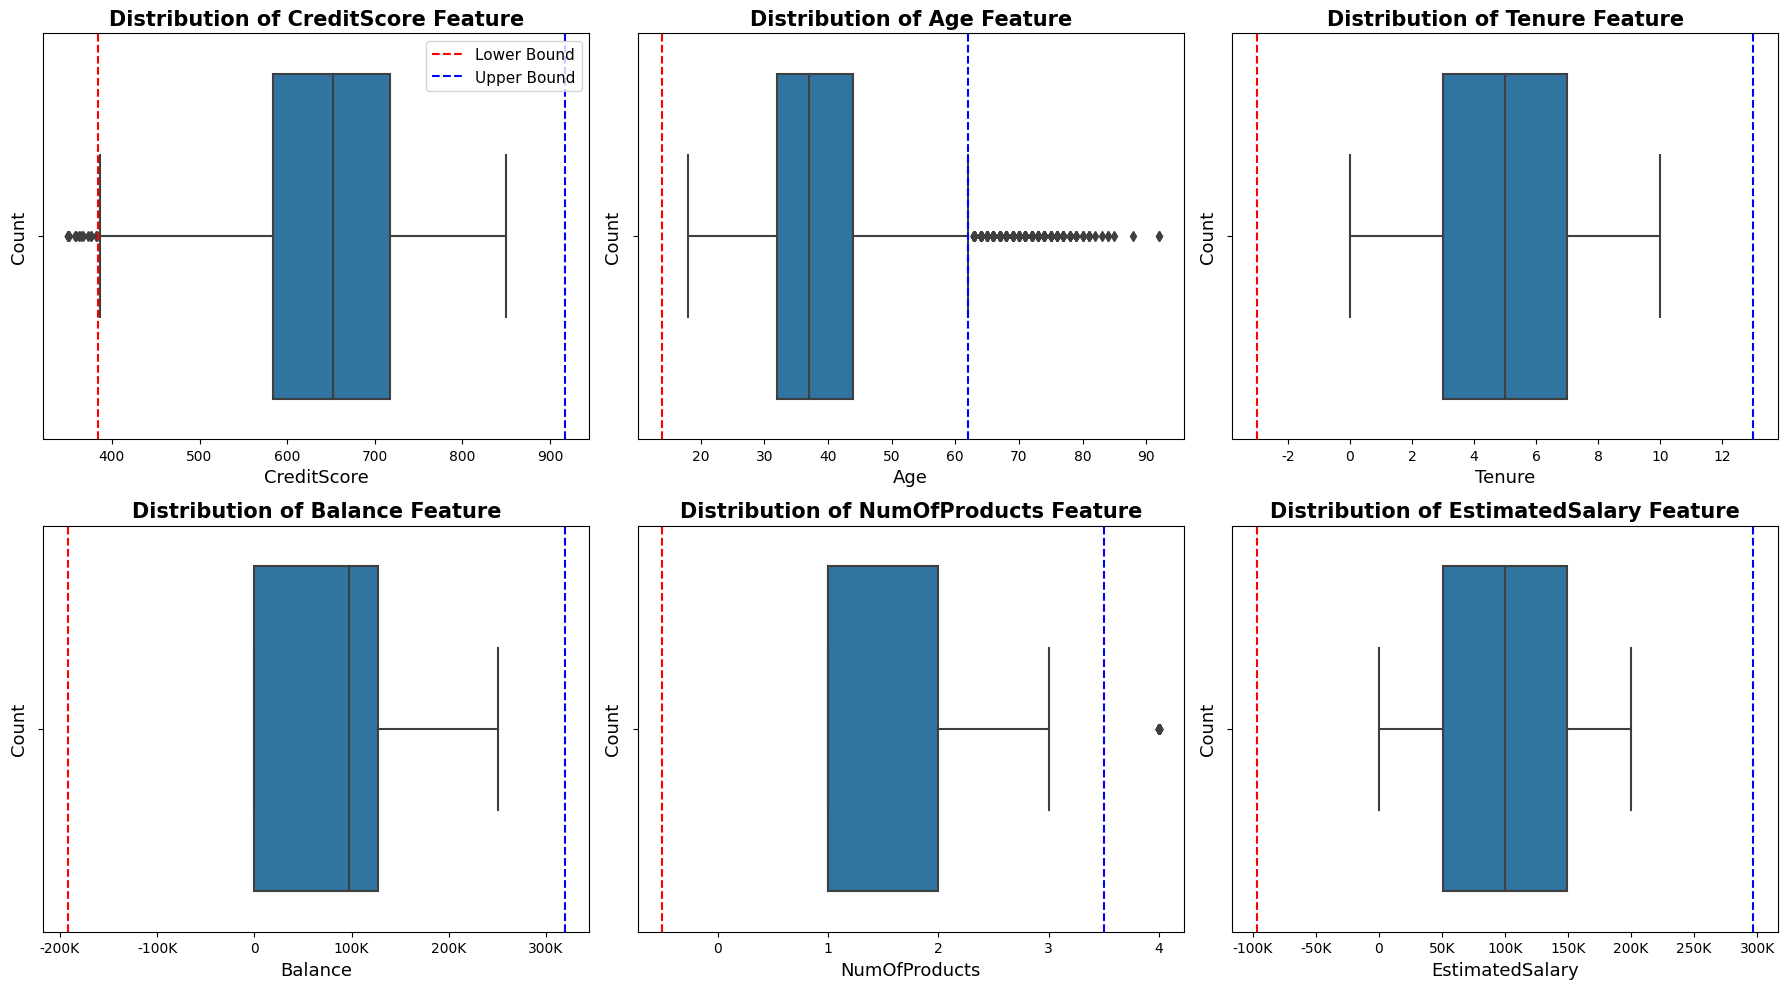

In [ ]:
# For better readability, I'm going to use K and M format for numerical figures
# For example: change 100,000 into 100k and 1,000,000 into 1M

# Function for K and M numerical formatting (including negative values)
def thousands_formatter(x, pos):
    abs_x = abs(x)
    if abs_x >= 1_000_000:
        formatted = f'{abs_x / 1_000_000:.0f}M'
    elif abs_x >= 1_000:
        formatted = f'{abs_x / 1_000:.0f}K'
    else:
        formatted = f'{int(abs_x)}'

    return f'-{formatted}' if x < 0 else formatted

formatter = FuncFormatter(thousands_formatter)

# List of Numerical features
numerical_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

# Create and set up the boxplots' size (enlarged for better readability)
plt.figure(figsize=(18, 10))

# Loop through each feature to plot its boxplot
for i, col in enumerate(numerical_features):
    ax = plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df_customer_clean, x=col, ax=ax)

    # Calculate IQR for outlier thresholds
    Q1 = df_customer_clean[col].quantile(0.25)
    Q3 = df_customer_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Add vertical lines for outlier thresholds on the boxplot visualization
    ax.axvline(lower_bound, color="red", linestyle="--", label="Lower Bound")
    ax.axvline(upper_bound, color="blue", linestyle="--", label="Upper Bound")

    ax.set_title(f"Distribution of {col} Feature", fontsize=15, fontweight="bold")
    ax.set_xlabel(col, fontsize=13)
    ax.set_ylabel("Count", fontsize=13)
    ax.xaxis.set_major_formatter(formatter)  # To make number formats more concise

    # Add legend only to first plot to avoid repetition
    if i == 0:
        ax.legend(fontsize=11)

plt.tight_layout()
plt.show()

For better readibility, I'm going to create **histplots** for numerical_features to see value distribution.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

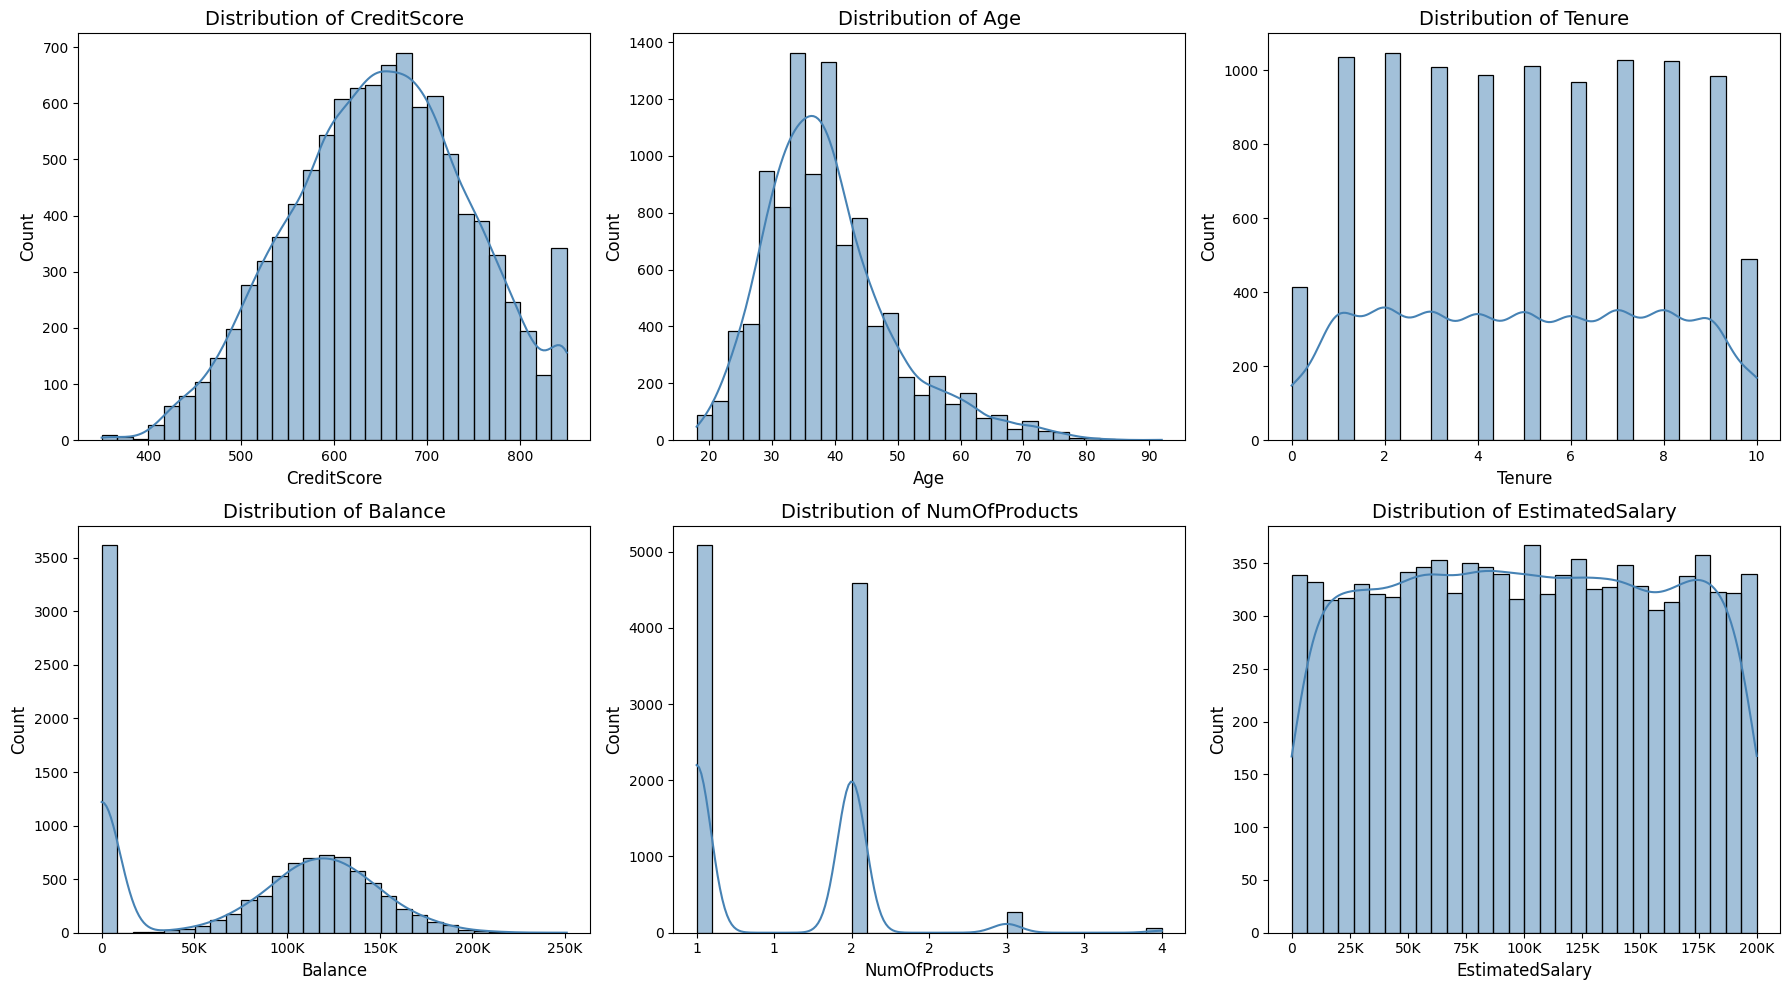

In [ ]:
# List of numerical features
numerical_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

# Create and set up the histplots' size (enlarged for better readability)
plt.figure(figsize=(18, 10))

# Loop through each feature to plot its histogram
for i, col in enumerate(numerical_features):
    ax = plt.subplot(2, 3, i + 1)
    sns.histplot(data=df_customer_clean, x=col, kde=True, bins=30, ax=ax, color='steelblue', edgecolor='black')

    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.tick_params(axis='both', labelsize=10)

    # Apply formatter to show large numbers in K and M format
    # For example: change 100,000 into 100k and 1,000,000 into 1M
    ax.xaxis.set_major_formatter(formatter)

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

In [ ]:
"""
1. The objective of the function below is to detect and summarize outliers in the given numerical columns using the IQR method.

2. Parameters of detect_outliers_iqr function:
- dataframe: pandas DataFrame containing the data (df_customer_clean)
- numerical_cols: list of numerical feature column names (numerical_features)

3. Returns:
- Show the result as a dataframe summarizing the number and percentage of outliers for each numerical feature
"""

# The functions to detect outliers inside the dataset using IQR method
def detect_outliers_iqr(dataframe, numerical_cols):
    outlier_summary = []

    for col in numerical_cols:
        # Calculating the lower and upper bounds of the dataframe
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds for outliers using IQR (interquartile range)
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify and count the outliers
        outliers = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        outlier_percentage = 100 * outlier_count / dataframe.shape[0]

        # Append the outliers result to summary list
        outlier_summary.append({
            "Feature": col,
            "Outlier Count": outlier_count,
            "Outlier Percentage (%)": round(outlier_percentage, 2)
        })

    # Convert to DataFrame table for easier readability
    return pd.DataFrame(outlier_summary)

# Apply the function to numerical_features of df_sustomer
numerical_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

# Assign df_customer as the dataframe of the function detect_outliers_iqr
# Assign numerical_features as the numerical_cols of the function detect_outliers_iqr
outlier_stats = detect_outliers_iqr(df_customer_clean, numerical_features)

# Display the results
print(outlier_stats)

           Feature  Outlier Count  Outlier Percentage (%)
0      CreditScore             16                    0.16
1              Age            359                    3.59
2           Tenure              0                    0.00
3          Balance              0                    0.00
4    NumOfProducts             60                    0.60
5  EstimatedSalary              0                    0.00


Since the **numerical_feature with the most outliers is Age**, I'm going to check the outliers of Age with IQR (interquartile range).

In [ ]:
# Calculate Q1 and Q3 (lower and upper bounds) of Age
Q1 = df_customer_clean["Age"].quantile(0.25)
Q3 = df_customer_clean["Age"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds using IQR (interquartile range)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter and show outlier values of Age
outliers_age = df_customer_clean[(df_customer_clean["Age"] < lower_bound)|(df_customer_clean["Age"] > upper_bound)]
print(outliers_age[["Age"]].describe())
print(outliers_age["Age"].value_counts().sort_index())

              Age
count  359.000000
mean    69.270195
std      5.237059
min     63.000000
25%     65.000000
50%     68.000000
75%     72.000000
max     92.000000
Age
63.0    40
64.0    37
65.0    18
66.0    35
67.0    37
68.0    19
69.0    22
70.0    18
71.0    27
72.0    21
73.0    13
74.0    18
75.0     9
76.0    11
77.0    10
78.0     5
79.0     4
80.0     3
81.0     4
82.0     1
83.0     1
84.0     2
85.0     1
88.0     1
92.0     2
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


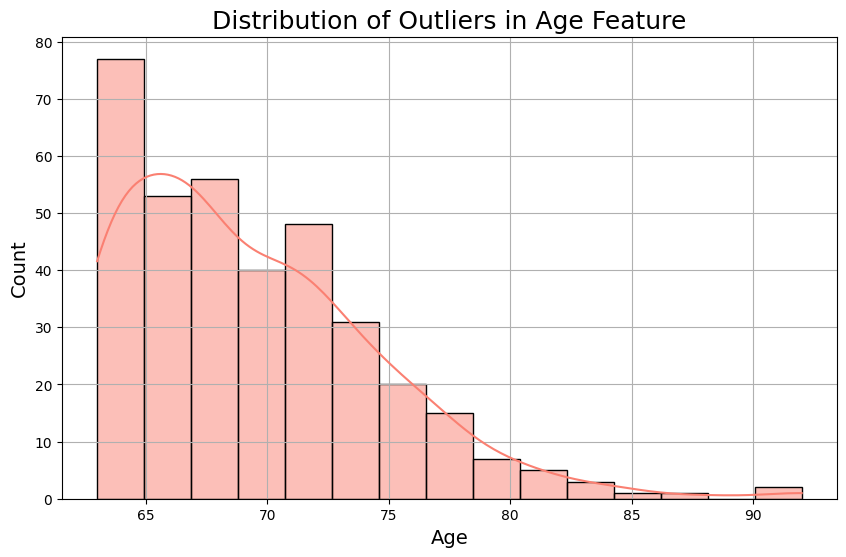

In [ ]:
# Show the distribution of Outliers values of Age
plt.figure(figsize=(10, 6))
sns.histplot(outliers_age["Age"], bins=15, kde=True, color="salmon")
plt.title("Distribution of Outliers in Age Feature", fontsize=18)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(True)
plt.show()

Based on the boxplots and histplots of df_customer_clean's **Numerical** features above, here's the conclusion and my decision regarding the outliers,
1. **CreditScore** only has 16 outliers (0.16%), this is acceptable.
2. **Age** has 359 outliers (3.59%), this is also acceptable but I'm going to remove customers aged 80+ years old from the dataset.
3. **Tenure** has no outliers.
4. **Balance** has no outliers.
5. **NumOfProducts** has 60 outliers (0.60%), this is acceptable.
6. **EstimatedSalary** has no outliers.

In [ ]:
# Remove rows (customer data) where Age > 80
# I create a new dataset named df_customer_filtered after dropping rows with Age values > 80
df_customer_filtered = df_customer_clean[df_customer_clean["Age"] <= 80]

In [ ]:
# New dataset after removing customers aged 80+ years old
# I create a new dataset named df_customer_filtered
df_customer_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9985 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9985 non-null   int64  
 1   Geography        9985 non-null   object 
 2   Gender           9985 non-null   object 
 3   Age              9985 non-null   float64
 4   Tenure           9985 non-null   int64  
 5   Balance          9985 non-null   float64
 6   NumOfProducts    9985 non-null   int64  
 7   HasCrCard        9985 non-null   int64  
 8   IsActiveMember   9985 non-null   int64  
 9   EstimatedSalary  9985 non-null   float64
 10  Exited           9985 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 936.1+ KB


In total, 17 rows containing customer data have been removed from the original dataset, now the current dataset has 9,985 values (df_customer_filtered).

## IV. DATA MANIPULATION

Since the outliers of numerical features have been removed, I can move on to the next steps which are as following,
1. Encoding the categorical_features
2. Scaling the numerical_features

In [ ]:
# 1. Encoding the categorical_features

categorical_features = ["Geography", "Gender", "HasCrCard", "IsActiveMember"]

# One-hot encode for "Geography" and "Gender"
# drop_first=True is to avoid dummy variable trap
df_customer_encoded = pd.get_dummies(df_customer_filtered, columns=["Geography", "Gender"], drop_first=True)

# Why only 2 features that get encoded? Because only "Geography" and "Gender" have object as their Dtype.

In [ ]:
# 2. Utilizing StandardScaler to standardize the values inside numerical_features

numerical_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

scaler = StandardScaler()
df_customer_encoded[numerical_features] = scaler.fit_transform(df_customer_encoded[numerical_features])

In [ ]:
df_customer_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.325893,0.302120,-1.041656,-1.226154,-0.911214,1,1,0.021783,1,False,False,False
1,-0.439807,0.205716,-1.387443,0.117016,-0.911214,0,1,0.216446,0,False,True,False
2,-1.537516,0.302120,1.033067,1.332694,2.526713,1,0,0.240601,1,False,False,False
3,0.502567,0.012908,-1.387443,-1.226154,0.807749,0,0,-0.109032,0,False,False,False
5,-0.056644,0.494928,1.033067,0.596985,0.807749,1,0,0.863615,1,False,True,True


In [ ]:
df_customer_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9985 entries, 0 to 10000
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9985 non-null   float64
 1   Age                9985 non-null   float64
 2   Tenure             9985 non-null   float64
 3   Balance            9985 non-null   float64
 4   NumOfProducts      9985 non-null   float64
 5   HasCrCard          9985 non-null   int64  
 6   IsActiveMember     9985 non-null   int64  
 7   EstimatedSalary    9985 non-null   float64
 8   Exited             9985 non-null   int64  
 9   Geography_Germany  9985 non-null   bool   
 10  Geography_Spain    9985 non-null   bool   
 11  Gender_Male        9985 non-null   bool   
dtypes: bool(3), float64(6), int64(3)
memory usage: 809.3 KB


Now I'm using a new dataset named **df_customer_encoded** with **encoded** categorical values (Geography and Gender) and **standardized** numerical values.

Brief explanation after encoding categorical_features and standardizing numerical_features are as following:

1. Numerical features have been transformed following standardization process using StandardScaler, now their values are distributed around zero.

2a. New features have been made and added to the dataset after encoding Categorical features,
- Geograpy_Germany.
- Geography_Spain.
- Gender_Male.

b. If both **Geography_Germany** and **Geography_Spain** are **False**, **then** the customer **Geography is France**.

c. If **Gender_Male** are **False**, **then** the customer gender is **Female**.

Now I can start setting up the Machine Learning model (ML model) using a chosen ML altgorithm, which is XGBoost Clasifier, why did I choose this model?

The reasons are because this model is suitable for predicting churn rate, has a built-in feature to avoid overfitting, no extra preprocessing steps are needed, and used for many kinds if industries or business sector.

Now there are some steps that I have to get through the process creating a ML model with high evaluation score,

1. Separate the data into feature (X) and target (y).
2. Split the data info Training Set and Testing Set.
3. Applying XGBoost model algorithm.
4. Model evaluation.

The **target feature (y)** is **Exited**.

## V. MODELLING PREPARATION

In [ ]:
# Separate the encoded dataset (df_customer_encoded) into features (X) and target (y)
X = df_customer_encoded.drop("Exited", axis=1)
y = df_customer_encoded["Exited"]

In [ ]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Train the model with XGBoost algorithm
best_model_baseline = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
best_model_baseline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:51:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## VI. MODELLING EVALUATION

In [ ]:
# Model evaluation after using XGBoost algorithm, I will call this model the Baseline XGBoost model
# I'm going to review the accuracy, precision, recall, f1-score and confusion matrix

y_pred = best_model_baseline.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1489  101]
 [ 191  216]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1590
           1       0.68      0.53      0.60       407

    accuracy                           0.85      1997
   macro avg       0.78      0.73      0.75      1997
weighted avg       0.84      0.85      0.85      1997



#### EVALUATION RESULT OF BASELINE XGBOOST MODEL

Based on the Confusion Matrix and Classification Report above, here are the results of **Baseline XGBoost Model**:

1. **Confusion Matrix** description,

[[1489  101]

 [ 191  216]]

a. 1,489 customers **did not churn** and were **correctly predicted** as **not churning**.

b. 101 customers **did not churn** but were **wrongly** **predicted** as **churning** (False Positive).

c. 191 customers **did churn** but were **wrongly predicted** as **staying** (False Negative).

d. 216 customers **did churn** and were **correctly predicted** as **churning**.

2. **Classification Report** description for loyal customers **(class/label 0)**, most of them got **good scores**.

a. The overall model **Accuracy** is 0.85.
- The model was able to **correctly predict 85% of the total customers**, whether they churn or not.
- For example, out of 100 customers, the model can correctly guess 85, either they churn or not.

b. **Precision score** for class/label 0 (not churn/stay) is 0.89.
- The model was able to recognize staying customers and correctly predicted 89% of them.
- While the remaining 11% were misclassified and were actually churned.

c. **Recall score** for class/label 0 (not churn/stay) is 0.94.
- Out of all customers who **actually stay**, the model was able to correctly identify and label 94% of them.

d. **F1-score** for class/label 0 (not churn/stay) is 0.91.
- This means that the model has a high ability to recognize customers who stay with the bank.

3. **Classification Report** description for churning customers **(class/label 1)** that **needs further handling**,

a. **Precision score** for class/label 1 (churn) is 0.68.
- Out of all customers that the model predicted would churn, only 68% actually churned.
- While the remaining 32% were wrongly predicted to churn as they actually stayed.

b. **Recall score** for class/label 1 (churn) is 0.53.
- Out of all customers who **actually churned**, the model was able to correctly identify and label 53% of them.
- While the remaining **47% churned customers** were missed or wrongly labeled as not churning.

c. **F1-score** for class/label 1 (churn) is 0.60.
- This means that the model has a moderate ability to recognize customers who will churn.
- A score of 0.60 suggests the model is still prone to mistakes. There is a **significant room for improvement**.

##### Therefore, scores that I need to improve from the Baseline XGBoost Model are as following:
1. Precision score for class/label 1(churn) = 68%.
2. Recall sore for class/label 1 (churn) = 53%.
3. F1-score for class/label 1 (churn) = 60%.

In [ ]:
# A reminder for myself regarding current and relevant features
df_customer_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9985 entries, 0 to 10000
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9985 non-null   float64
 1   Age                9985 non-null   float64
 2   Tenure             9985 non-null   float64
 3   Balance            9985 non-null   float64
 4   NumOfProducts      9985 non-null   float64
 5   HasCrCard          9985 non-null   int64  
 6   IsActiveMember     9985 non-null   int64  
 7   EstimatedSalary    9985 non-null   float64
 8   Exited             9985 non-null   int64  
 9   Geography_Germany  9985 non-null   bool   
 10  Geography_Spain    9985 non-null   bool   
 11  Gender_Male        9985 non-null   bool   
dtypes: bool(3), float64(6), int64(3)
memory usage: 809.3 KB


## VII. MODELLING IMPROVEMENT

### **PART 1**

**TUNED XGBOOST**

In order to improve the Baseline XGBoost model's ability to detect & predict customers who are likely to churn, which is by increasing the score of **Recall, Precision and F1-score for label 1 (churn)**, I'm going to perform **hyperparameter tuning** on the Baseline XGBoost model. The tuned model will be named as **Tuned XGBoost**.

The steps I'm going to take are as following,
1. Import necessary libraries (and packages) from `sklearn`.
2. Prepare features (X) and target (y) by splitting datasets into training & testing sets.
3. Define parameter grid which includes no. of trees, tree depth, learning rate & sampling strategies.
4. Run GridSearchCV to search through all possible combinations of parameters defined.
5. Select the best model that gave the highest score.
6. Evaluate the tuned XGBoost model by testing on the test dataset and evaluating its performance using confusion matrix and classification report.

In [ ]:
# Split features (X) and target (y), then divide the latest dataset (df_customer_encoded) into training and testing sets

X = df_customer_encoded.drop("Exited", axis=1)
y = df_customer_encoded["Exited"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Define parameter combinations to test one by one during model tuning session

param_grid = {
    "n_estimators": [100, 200],        # No. of guesses the model makes (the more the better, but it's going to be slower)
    "max_depth": [3, 5, 7],            # How deep the model explores each decision
    "learning_rate": [0.01, 0.1, 0.2], # How many each new guess changes the final result
    "subsample": [0.8, 1],             # Whether the model uses all data or just part of it when making a guess
    "colsample_bytree": [0.8, 1]       # Whether the model uses all features or just part of them per guess
}

In [ ]:
# Train XGBoost model using the best parameter combination search

xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="f1",      # Focus on F1-score for label 1 (churn)
    cv=5,              # Divide the training data into 5 parts for cross-validation
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:51:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:51:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:51:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:51:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:51:44] WARNING: /w

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1]},
             scoring='f1', verbose=1)

In [ ]:
# Show the best found parameters and best model

print("Best Parameters:", grid_search.best_params_)
best_model_tuned = grid_search.best_estimator_

Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}


In [ ]:
# Evaluate best XGBoost model performance on Test Data

y_pred = best_model_tuned.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1514   76]
 [ 190  217]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1590
           1       0.74      0.53      0.62       407

    accuracy                           0.87      1997
   macro avg       0.81      0.74      0.77      1997
weighted avg       0.86      0.87      0.86      1997



### PART 2

**TUNED XGBOOST+SMOTE**

The steps I'm going to take are as following,
1. Import necessary libraries (and packages) including SMOTE from `imblearn`.
2. Apply SMOTE to balance the class distribution in the training set only (not on the test set).
3. Verify the new balanced class distribution in the resampled training set.
4. Define combinations of parameter grid for testing.
5. Apply `GridSearchCV` with `scoring="recall"` and 5-fold cross validation to optimize model recall.
6. Display the best found parameters and save the best performing model.
7. Evaluate final and best performing model performance on untested set Confusion Matrix and Classification Report.

In [ ]:
# Split features (X) and target (y) into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Apply SMOTE only to training data, not test data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
# Show label distribution after balancing

print("Label distribusi applying SMOTE:")
print(y_train_balanced.value_counts())

Label distribusi applying SMOTE:
Exited
0    6359
1    6359
Name: count, dtype: int64


In [ ]:
# Prepare parameter combinations for testing

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1],
    "colsample_bytree": [0.8, 1]
}

In [ ]:
# Tune the model using balanced data, focusing on Recall score
# There's a chance of changes happened to Precision and F1-score

xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

grid_search_smote = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="recall",   # Focusing on Recall score to churn
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search_smote.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:52:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:52:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:52:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:52:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:52:15] WARNING: /w

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1]},
             scoring='recall', verbose=1)

In [ ]:
#  Display best parameters from retuning with SMOTE

print("Best Parameters (SMOTE + recall):", grid_search_smote.best_params_)
best_model_smote = grid_search_smote.best_estimator_

Best Parameters (SMOTE + recall): {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
# Test tuned model on original (unbalanced) test data

y_pred_smote_grid = best_model_smote.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote_grid))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_smote_grid))

Confusion Matrix:
[[1444  146]
 [ 179  228]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1590
           1       0.61      0.56      0.58       407

    accuracy                           0.84      1997
   macro avg       0.75      0.73      0.74      1997
weighted avg       0.83      0.84      0.83      1997



#### EVALUATION RESULT OF TUNED XGBOOST+SMOTE

The goal was to address class imbalance by applying SMOTE before XGBoost tuning, in order to improve Recall score along with the others.

The **Classification Report after** tuning the model with **SMOTE balancing** *(XGBoost+SMOTE)* compared to the **Baseline XGBoost model** are as following,
1. A decrease of Precision score of class/label 1 (churn) from 0.68 to 0.61 **(worse)**.
2. A slight increase of Recall score for class/label 1 (churn) from 0.53 to 0.56 **(better)**.
3. A slight drop of F1-score of class/label 1 (churn) from 0.60 to 0.58 **(worse)**.
4. A minimum drop or overall Accuracy score from 0.85 to 0.84 **(worse)**.

**Confusion Matrix - Baseline XGBoost model**:

 [[1489   101]

 [ 191  216]]

**Confusion Matrix - XGBoost+SMOTE**:

[[1444  146]

 [ 179  228]]

Meanwhile the comparison of **Confusion Matrix** results of **XGBoost+SMOTE** compared to the **Baseline XGBoost model** are as following,
- XGBoost+SMOTE has less True Negatives (1,444) and more False Positives (146) than the Baseline XGBoost model's True Negatives (1,489) and False Positives (101).
- XGBoost+SMOTE has less False Negatives (179) and more True Positives (228) than the Baseline XGBoost model's False Negatives (191) and True Positives (216).

**Conclusion**:
1. SMOTE balancing helped improve the detection of churn chases, but relatively small.
2. This improvement came with trade offs, such as lower precision and reduced generalization to real imbalanced data.
3. This indicates the model has better ability to detect churn customers, but it also produced more false positives, which could lead to unnecessary inteventions because it mistakenly classifying loyal customers as churners.
4. **If the business prioritizes minimizing missed churn cases (maximise Recall), the trade offs are acceptable**.

For the next step, I'm going to try improving the scores with class_weight=balanced method with XGBoost.

### PART 3

**TUNED XGBOOST+CLASS WEIGHTING** *(scale_pos_weight)*  

The goal for this part is to improve model's ability to detect churn cases correctly (label 1) without compromising overall performance.

I decided to try `class_weight="balanced"` method with XGBoost to handle class imbalance without SMOTE as it can automatically adjust class weights proporsionally to class frequencies.

The steps that I'm going to take are as following,
1. Add `scale_pos_weight` or equivalent `"class_weight=balanced"` logic in XGBoost.
2. Perform hyperparameter tuning if needed.
3. Evaluate performance on the test set, focus on Precision, Recall, and F1-score for both classes (0 for not churn and 1 for churn).

Therefore, I want to create a balanced score between Recall score without decreasing Precision and Accuracy for both classes.

What is `scale_pos_weight` in `XGBoost`?
1. It is a parameter in XGBoost used to address class imbalance.
2. The parameter works by giving higher importance (wight) to any minority class, for this case, the minority class is churn customers (label 1) during training.
3. This adjustment helps the model to pay more attention to the minority class with oversampling (like SMOTE) or undersampling.
4. Although XGBoost doesn't support `class_weight="balanced"` like RandomForest or LogisticRegression, the `scale_pos_weight` acts similarly and recommended when dealing with imbalanced binary classification.

In [ ]:
# Calculate scale_pos_weight as the ratio of majority class to minority class
counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]  # 0 for Not Churn / 1 for Churn

print(f"scale_pos_weight: {scale_pos_weight:.2f}")

scale_pos_weight: 3.90


In [ ]:
# Initialize the XGBoost model with the computed scale_pos_weight

best_model_weighted = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight
)

In [ ]:
# Train the model on the original (unbalanced) training set

best_model_weighted.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:52:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# Evaluate the model on the test set
y_pred = best_model_weighted.predict(X_test)

In [ ]:
# Print evaluation results

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1362  228]
 [ 148  259]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1590
           1       0.53      0.64      0.58       407

    accuracy                           0.81      1997
   macro avg       0.72      0.75      0.73      1997
weighted avg       0.83      0.81      0.82      1997



#### EVALUATION RESULT AFTER TUNED XGBOOST WITH CLASS WEIGHTING (`SCALE_POS_WEIGHT`)

The original goal of utilizing this method was to improve model's ability to detect churn cases correctly (label 1) without compromising overall performance.

The **Classification Report** of the aftermath after using `scale_pos_weight` compared to the **Baseline XGBoost model** were as following,

A. **For class/label 0 (not churn/stay)**:
1. The **Precision score** remained high at 0.90 compared to 0.89 **(better)**.
2. The **Recall score** decreased from 0.94 to 0.86 **(worse)**.
3. The **F1-score** decreased slightly from 0.91 to 0.88 **(worse)**.

B. **For class/label 1 (churn/not stay)**:
1. The **Precision score** decreased significantly from 0.68 to 0.53 **(worse)**.
2. The **Recall score** increased significantly from 0.53 to 0.64 **(better)**.
3. The **F1-score** decreased slightly from 0.60 at 0.58 **(worse)**.

C. As for the overall **Accuracy** stated on the **Classification Report**, the score decreased from 0.85 to 0.81 **(worse)**.

**Confusion matrix - Baseline XGBoost model**

[[1489  101]

 [ 191  216]]

**Confusion matrix - scale_pos_weight**

[[1362  228]

 [ 148  259]]

Meanwhile the comparison of **Confusion Matrix** results compared to the **Baseline XGBoost model** are as following,
- scale_post_weight has less True Negatives (1,362) and more False Positives (228) than Baseline XGBoost model's True Negatives (1,489) and False Positives (101).
- scale_pos_weight has less False Negatives (148) and more True Positives (259) than Baseline XGBoost model's False Negatives (191) and True Positives (216).

**Conclusion**:
1. In terms of detecting churn (class/label 1), the model trained with `scale_pos_weight` outperformed the `Baseline XGBoost model`, particularly in Recall score.
2. It achieved a higher Recall score and correctly identified more True Positives, meaning it was better at capturing actual churners.
3. This indicates that the scale_pos_weight model is more responsive in detecting customers who are likely to churn, which can be useful for proactive retention strategies.
4. Although the Precision score decreased significantly, this condition is often acceptable in business context is where identifying as many potential churners as possible is more important than minimizing false alarms (wrong prediction).
5. Therefore, if the business goal is to reduce customer churn risk through targeted intervention, the model with `class weighting (scale_pos_weight)` is the more suitable choice, even if it comes at the cost of a few more false positives.

## VIII. MODEL COMPARISON

In this part, I'm going to compare the performance of **XGBoost** model with another model such as,
1. **LogisticRegression**
2. **RandomForestClassifier**
3. **DecisionTreeClassifier**


Comparison Model: Logistic Regresslogisticion
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1590
           1       0.63      0.25      0.36       407

    accuracy                           0.82      1997
   macro avg       0.73      0.61      0.62      1997
weighted avg       0.79      0.82      0.78      1997



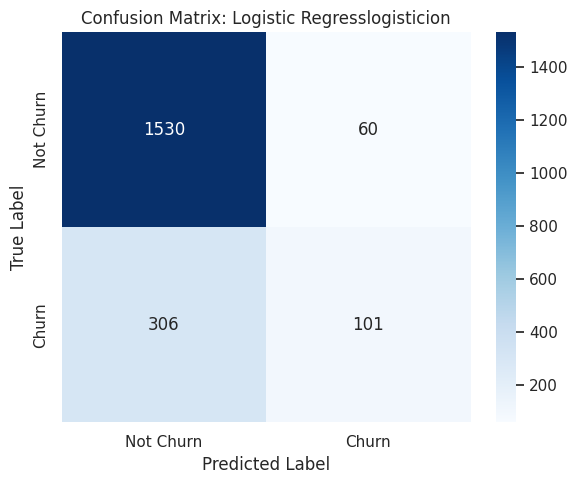


Comparison Model: Random Forest
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1590
           1       0.78      0.53      0.63       407

    accuracy                           0.87      1997
   macro avg       0.84      0.74      0.78      1997
weighted avg       0.87      0.87      0.86      1997



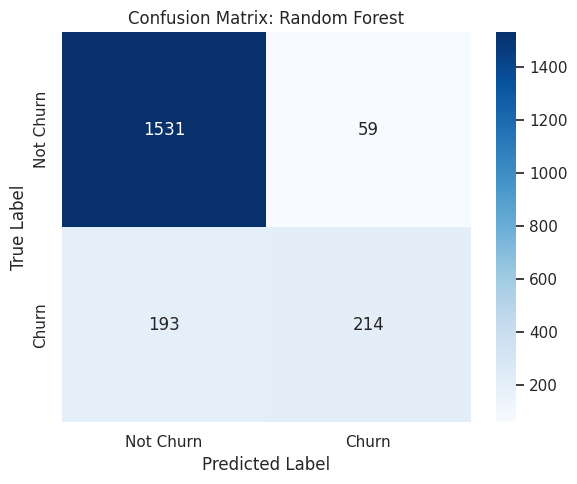


Comparison Model: Decision Tree
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1590
           1       0.49      0.51      0.50       407

    accuracy                           0.79      1997
   macro avg       0.68      0.69      0.69      1997
weighted avg       0.80      0.79      0.79      1997



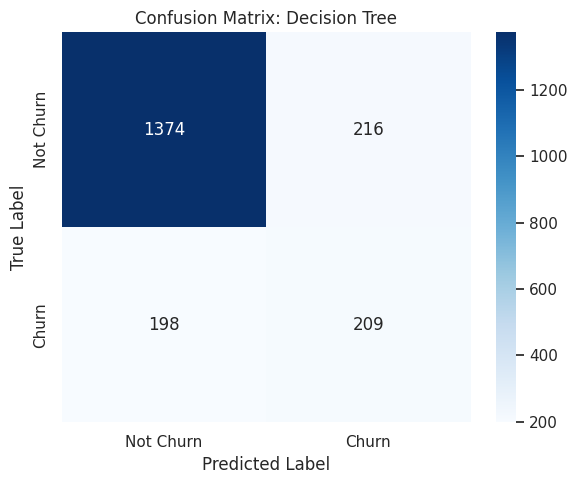

In [ ]:
# Define classification models for comparison
models = {
    "Logistic Regresslogisticion": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Set style for plots
sns.set(style="whitegrid")

# Loop through chosen models for comparison
for name, model in models.items():

    # Train the chosen model
    model.fit(X_train, y_train)

    # Predict the test set
    y_pred = model.predict(X_test)

    # Print chosen model name and classification report from each of them
    print(f"\nComparison Model: {name}")
    print(classification_report(y_test, y_pred))

    # Generate confusion matrix from each of them
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix of chosen models using heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Not Churn", "Churn"],
                yticklabels=["Not Churn", "Churn"])
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

Now I can see that the performance of LogisticRegression, RandomForestClassifier, and DecisionTreeClassifier were still below XGBoost model's performance. Therefore, I was correct to use XGBoost model from the beginning of supervised machine learning model building in the previous section.

## IX. MODEL SELECTION

#### Here are the visualization for the performance of all XGBoost models trained with and without hyperparameter tuning.

**Note**:
1. Baseline XGBoost Model = best_model_baseline
2. Tuned XGBoost = best_model_tuned
3. XGBoost+SMOTE = best_model_smote
4. XGBoost+Class Weighting = best_model_weighted


Model: Baseline XGBoost
              precision    recall  f1-score   support

   Not Churn       0.89      0.94      0.91      1590
       Churn       0.68      0.53      0.60       407

    accuracy                           0.85      1997
   macro avg       0.78      0.73      0.75      1997
weighted avg       0.84      0.85      0.85      1997



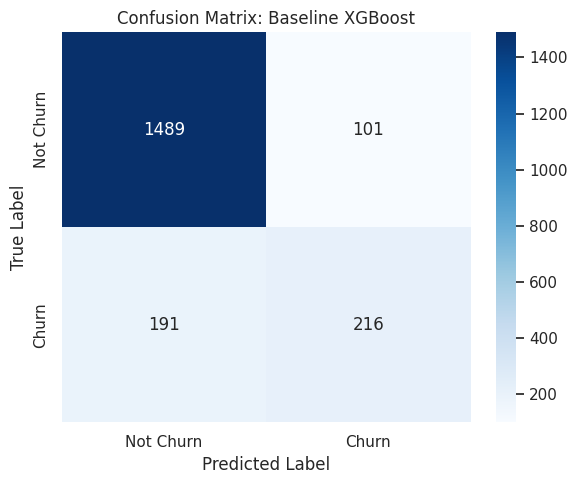


Model: Tuned XGBoost
              precision    recall  f1-score   support

   Not Churn       0.89      0.95      0.92      1590
       Churn       0.74      0.53      0.62       407

    accuracy                           0.87      1997
   macro avg       0.81      0.74      0.77      1997
weighted avg       0.86      0.87      0.86      1997



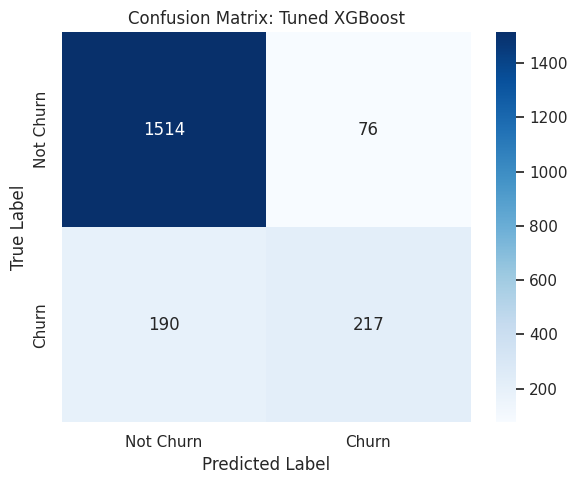


Model: Tuned XGBoost + SMOTE
              precision    recall  f1-score   support

   Not Churn       0.89      0.91      0.90      1590
       Churn       0.61      0.56      0.58       407

    accuracy                           0.84      1997
   macro avg       0.75      0.73      0.74      1997
weighted avg       0.83      0.84      0.83      1997



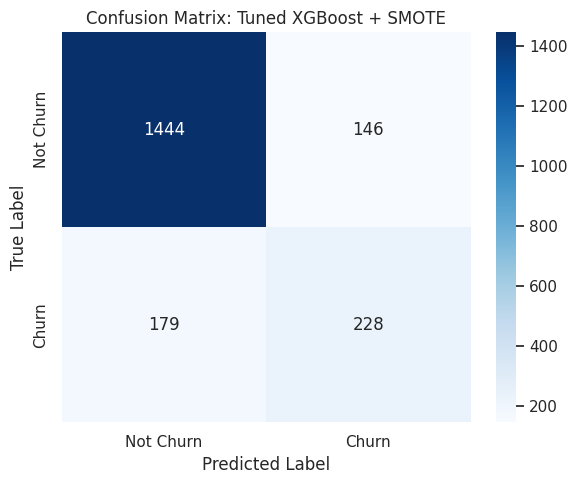


Model: Tuned XGBoost + Class Weighting
              precision    recall  f1-score   support

   Not Churn       0.90      0.86      0.88      1590
       Churn       0.53      0.64      0.58       407

    accuracy                           0.81      1997
   macro avg       0.72      0.75      0.73      1997
weighted avg       0.83      0.81      0.82      1997



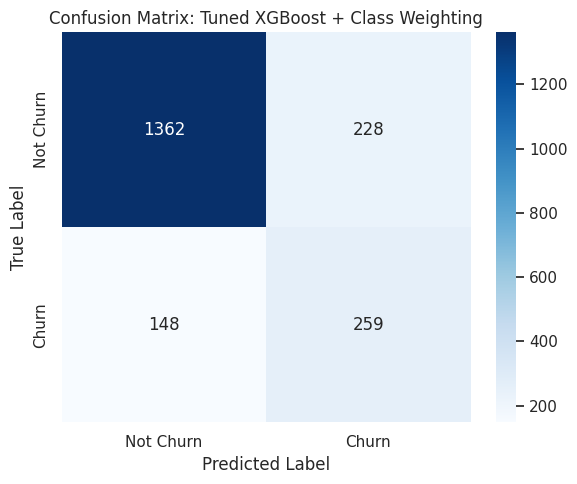

In [ ]:
# y_test simulation of Ground Truth (1590 & 407)
y_test = [0]*1590 + [1]*407

# Prediction of training Simulation results of 4 XGBoost models
model_results = {
    "Baseline XGBoost": [0]*1489 + [1]*101 + [0]*191 + [1]*216,
    "Tuned XGBoost": [0]*1514 + [1]*76 + [0]*190 + [1]*217,
    "Tuned XGBoost + SMOTE": [0]*1444 + [1]*146 + [0]*179 + [1]*228,
    "Tuned XGBoost + Class Weighting": [0]*1362 + [1]*228 + [0]*148 + [1]*259
}

# Set plot style
sns.set(style="whitegrid")

# Visualization loopfor each XGBoost model
for name, y_pred in model_results.items():
    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred, target_names=["Not Churn", "Churn"]))

    cm = confusion_matrix(y_test, y_pred)

    # Confusion Matrix plot
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Not Churn", "Churn"],
                yticklabels=["Not Churn", "Churn"])
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

**1. BASELINE XGBOOST Model (UNTUNED)**

i. **Confusion Matrix**

[[1489   101]

 [ 191   216]]

ii. **Classification Report**

a. Not Churn (label 0) score:
- Precision: 0.89
- Recall: 0.94
- F1-score: 0.91

b. Churn (label 1) score:
- Precision: 0.68
- Recall: 0.53
- F1-score: 0.60

c. Overall Accuracy score: 0.85

d. The original model without any tuning has pretty solid performance, yet outperformed by model 2 in every aspect.

**2. TUNED XGBOOST Model**

i. **Confusion Matrix**

[[1514   76]

 [ 190   217]]

ii. **Classification Report**

a. Not Churn (label 0) score:
- Precision: 0.89
- Recall: 0.95
- F1-score: 0.92

b. Churn (label 1) score:
- Precision: 0.74
- Recall: 0.53
- F1-score: 0.62

c. Overall Accuracy score: 0.87

d. This model is strong in balancing Precision and Recall for churn detection, which is suitable for real-world predictions that require high accuracy while remaining responsive to churn behavior.

**3. TUNED XGBOOST+SMOTE Model**

i. **Confusion Matrix**

[[1444   146]

 [ 179   228]]

ii. **Classification Report**

a. Not Churn (label 0) score:
- Precision: 0.89
- Recall: 0.91
- F1-score: 0.90

b. Churn (label 1) score:
- Precision: 0.61
- Recall: 0.56
- F1-score: 0.58

c. Overall Accuracy score: 0.84

d. This model is more sensitive to churn but generates too many False Positives, which means that it wrongly flagged non-churn customers as churn. This model is less suitable when intervention costs are high.

**4. TUNED XGBOOST+CLASS WEIGHTING Model** *(scale_pos_weight)*

i. **Confusion Matrix**

[[1362   228]

 [ 148   259]]

ii. **Classification Report**

a. Not Churn (label 0) score:
- Precision: 0.90
- Recall: 0.86
- F1-score: 0.88

b. Churn (label 1) score:
- Precision: 0.53
- Recall: 0.64
- F1-score: 0.58

c. Overall Accuracy score: 0.81

d. This is the most aggresive model in detecting churn customers, but it comes with reduced Precision and overall Accuracy. This model is recommended if the business' priority is minimizing churn even though it presents lots of false alarm.

## X. SAVING THE CHOSEN MODEL FOR FUTURE TEST & USE

Based on the brief summary and visualization of the performance from each XGBoost model above, I'm going to choose **TUNED XGBOOST Model** as the best model for this case, and I'm going to save it for future use testing.

In [ ]:
# 1. Retrain and save the chosen model which is Tuned XGBoost model

# Retrain using only ready to analyze dataset
# The dataset that has been cleaned, prepared and manipulated
X = df_customer_encoded.drop("Exited", axis=1)
y = df_customer_encoded["Exited"]

In [ ]:
# Split the data again into Train & Test data (using random_state to replicate)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Utilize the best parameter from GridSearchCV results, which was created during XGBoost evaluation process
best_model_tuned_XGBoost = XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.2,
    subsample=1,
    colsample_bytree=1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# The parameter of best_model_tuned_XGBoost is exactly the same as best_model_tuned
# If there are doubts regarding the parameter, I can double check using these two codes below:
# print(best_model_tuned.get_params())
# print(best_model_tuned_XGBoost.get_params())
# So, even if the conducted test is using a 'new model' named best_model_tuned_XGBoost, rest assured that it's exactly the same as best_model_tuned (Tuned XGBoost model)

In [ ]:
# Train the model
best_model_tuned_XGBoost.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:53:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# Save the trained model into the file
joblib.dump(best_model_tuned_XGBoost, "tuned_xgboost_model.pkl")
print("Tuned XGBoost Model has been saved as tuned_xgboost_model.pkl")

Tuned XGBoost Model has been saved as tuned_xgboost_model.pkl


### ROC Curve Analysis for Tuned XGBoost Model

After saving the Tuned XGBoost model, I'm going to analyze the ROC Curve and calculate the ROC-AUC score. This is an evaluation to further evaluate model performance.

The evaluation helps me understand how well the model can distinguish between churn and non-churn customers across different classification thresholds.

The **ROC** curve **(Receiver Operating Characteristic)** plots the True Positive Rate (Sensitivity) against the False Positive Rate (1-Specificity).

A model with good performance will have a curve that bows toward the top-left corner. The closer the **AUC (Area Under Curve)** is to 1, the better the model.

ROC-AUC Score: 0.93


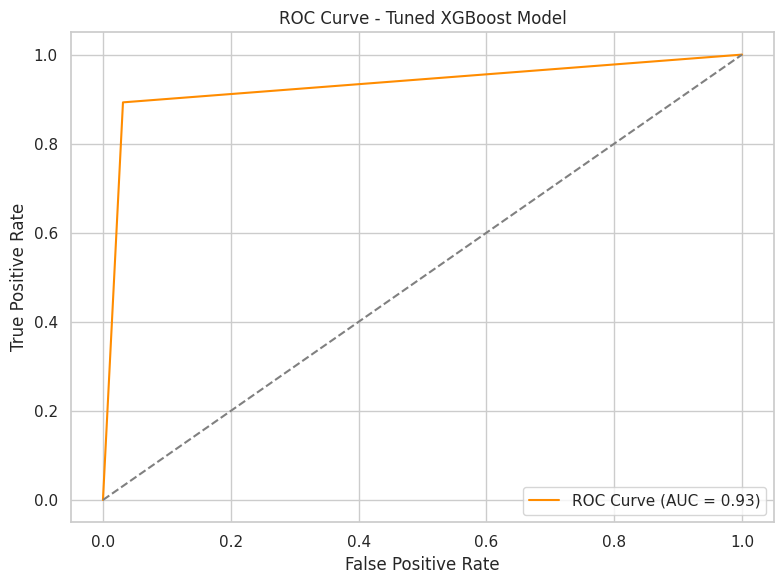

In [ ]:
# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", round(roc_auc, 2))

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned XGBoost Model")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

### ROC-AUC Interpretation

I. **General guideline** for **ROC-AUC Score** is as following,

**ROC-AUC Score** - **Interpretation**

- 0.9-1.0	--> Excellent or outstanding
- 0.8-0.9	--> Very good
- 0.7-0.8	--> Good
- 0.6-0.7	--> Fair
- 0.5-0.6	--> Poor
- 0.5	--> No better than random
- < 0.5 --> Worse than random

II. Based on the ROC curve above, the ROC-AUC score obtained **0.86**, which falls under the **“Very Good”** category.

The score indicates that the **Tuned XGBoost model** has **strong discriminative power** and **performs well** in **distinguishing** between **churn and non-churn** customers.

It is particularly important in imbalanced datasets where accuracy alone is not sufficient to evaluate performance.

Now I have saved the best model to predict Bank Customer Churn which is **Tuned XGBoost Model** as **tuned_xgboost_model.pkl** into the file.

After this, I'm going to test the **Tuned XGBoost Model** on a new customer dataset.

In [ ]:
df_customer_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9985 entries, 0 to 10000
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9985 non-null   float64
 1   Age                9985 non-null   float64
 2   Tenure             9985 non-null   float64
 3   Balance            9985 non-null   float64
 4   NumOfProducts      9985 non-null   float64
 5   HasCrCard          9985 non-null   int64  
 6   IsActiveMember     9985 non-null   int64  
 7   EstimatedSalary    9985 non-null   float64
 8   Exited             9985 non-null   int64  
 9   Geography_Germany  9985 non-null   bool   
 10  Geography_Spain    9985 non-null   bool   
 11  Gender_Male        9985 non-null   bool   
dtypes: bool(3), float64(6), int64(3)
memory usage: 809.3 KB


**PS:**

a. If both Geography_Germany and Geography_Spain are False, then the customer Geography is France.

b. If Gender_Male are False, then the customer gender is Female.

In [ ]:
# 2. Predict Bank Customer Churn using Tuned XGBoost Model

# Please make sure the tested dataset has exactly the same features in the df_customer_encoded dataset
# If I receive a new dataset to be tested which is still raw, then me or the Data Analyst should do data preprocessing first
# The steps are pretty much the same like the ones I did for this dataset, such as data cleaning, preparation & manipulation

new_customer_example = pd.DataFrame([{
    'CreditScore': 575,
    'Geography_Germany': 0,
    'Geography_Spain': 0,
    'Gender_Male': 1,
    'Age': 43,
    'Tenure': 4,
    'Balance': 100000,
    'NumOfProducts': 3,
    'HasCrCard': 1,
    'IsActiveMember': 1,
    'EstimatedSalary': 75000
}])

In [ ]:
# Load model
chosen_model_loaded = joblib.load("tuned_xgboost_model.pkl")

# Re-arrange the sequence of features of new dataset before getting tested by the model
# If the features sequence is different than the dataset used for model training, it will cause coding error
new_customer_example = new_customer_example[chosen_model_loaded.get_booster().feature_names]

# Prediction steps
prediction = chosen_model_loaded.predict(new_customer_example) # Create label for prediction, 1 means Churn while 0 means Not Churn
proba = chosen_model_loaded.predict_proba(new_customer_example) # Calculate the probability for each class

label = "Churn" if prediction [0] == 1 else "Not Churn" # If prediction [0] is 1, it means Churn, if the result is 0 then it means Not Churn
print(f"Prediction: {label}") # Show the prediction result as Churn or Not Churn
print(f"Probability: {proba[0]}") # Show the probability of Churn and Not Churn

Prediction: Churn
Probability: [0.07591051 0.9240895 ]


In [ ]:
print("Classes:", chosen_model_loaded.classes_)
print("Probability for each class:", proba[0])

Classes: [0 1]
Probability for each class: [0.07591051 0.9240895 ]


Well, it shows that the model could predict customer churn based on relevant features.

How if a new and raw customer dataset is given to be tested for this model?

If it happens, then me or another Data Analyst will perform data cleaning, preparation and manipulation before being tested with **Tuned XGBoost Model**.

## XI. KEY STEPS TAKEN

1. Data Cleaning & Preparation
- Review dataset in general and check unique values from relevant features.
- Identify and dropped duplicated rows.
- Handled null values, verified data types, and transform wrong data types.
- Removed irrelevant features, such as RowNumber, CustomerId, and Surname.

2. Exploratory Data Analysis (EDA)
- Investigated values distribution from each relevant features using boxplot and histplot.
- Detected outliers and remove unnecessary outliers from certain features.
- Separate numerical features and categorical features.

3. Feature Engineering
- Standardized numerical features using Standard Scaler.
- Converted categorical features like Geography and Gender using One Hot Encoding.
- Applied One Hot Encoding with drop_first=True to avoid dummy variable traps

4. Train-Test Split
- The data was split 80/20 to create Training and Testing sets.

5. Model Building & Evaluation
- Tested XGBoost model because it has the highest performance compared to other model.
-  Evaluated overall Accuracy, Precision, Recall, and F1-score based on Classification Report and Confusion Matrix.

6. Hyperparameter Tuning
- Performed GridSearchCV on XGBoost for best parameter selection.
- The best results are achieved with parameter as following `colsample_bytree=1`, `learning_rate=0.2`, `n_estimators=200`, etc.
- Tried tuning the baseline XGBoost model with `SMOTE` and `Class Weighting`.

7. Final Prediction
- Saved the best supervised machine learning model, which is **Tuned XGBoost Model** as **tuned_xgboost_model.pkl** with joblib.
- Calculated and visualized the ROC-AUC score with ROC curve.
- Tested the trained model with random customer data.

## XII. EXECUTIVE SUMMARY

This project focuses on predicting **Customer Churn** in a bank using **Supervised Machine Learning** approach. The objective is to identify whether a customer is likely to close the account and leave the bank **(churn)** based on demographic, products owned and financial information.

The dataset provided from Kaggle consists of around 10,000 customers with features like gender, age, geography, tenure, balance, credit score, no. of products used, credit card ownership, activity status, and salary. The target variable is called `Exited`, which indicates churn (1) or not churn/stay (0).

After evaluating multiple machine learning models, I decided to use **tuned XGBoost Classifier** *(Tuned XGBoost Model)* to get the best results.